# Neural Netwok Modelling, Step 4

This the final section of the code required for this project. This section trains neural network that helps in predciting the prices of properties in the UK. A complete analysis will be given for each and every code and define the purpose.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import r2_score


sklearn.model_selection.train_test_split: This function helps to split the data into Training and testing.

sklearn.model_selection: Standardizes the features into scales it's units. 

Tensor Flow: Open source library for machine learning and deep learning algorithmns

tensorflow.keras: High level API that helps building and training machine learning models

sklearn.metrics.r2_score: Calculates R^2 metric and showcases the accuracy


In [2]:
# Loading the dataset
data = pd.read_csv('combined.csv')

In [3]:
# Extracts Year and Month from the Date column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [4]:
# Defining features and target variables
features = [
    'Sales volume','Year', 'Month',
    'Price Mortgage Purchase Index',
    'Former Owner Price Index',
    'House price index First-time buyers',
    'House price index Cash purchases',
    'House price index Terraced houses',
    'Semi-Detached House Price Index',
    'House price index Detached houses',
    'Existing Properties Index',
    'Flats Price Index',
    'House price index New build'
]

target_variables = [
    'Average price All property types',
    'Average price Mortgage purchases',
    'Average price Former owner-occupiers',
    'Average price Cash purchases',
    'Average price Existing properties',
    'First-time Buyers Price',
    'Terraced House Price',
    'Semi-Detached House Price',
    'Average price Detached houses',
    'Flats Price',
    'Average price New build'
]


The features are the one that are highly in correlation which will be taken for training the dataset and target_varibles are the predicted values this project needs as output. 

In [5]:
# Drops rows with missing values
data = data.dropna(subset=features + target_variables)

In [6]:
# Spliting data into features (X) and target (y)
X = data[features]
y = data[target_variables]    #!!!Most Important step!!!

In [7]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The code below Splits as X, becomes the feature values with train and split and y becomes Target variables that is required to obtain the predictions. Training data is 80% and Testing data is 20%.

In [8]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

The below Code is the most important part fot this project. The code below builds a neural network model. The model has 13 varibales in input layer and 11 variables in the output layer. It is built with 4 hidden layers with neurons (128, 256, 128, 64) with relu as activation function. This can be customisable to check different training outcomes. More details are explained in the report. 

In [9]:
# Artificial Neural Network model     #!!Important!
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1])  # Output layer with neurons matching the number of target variables
])  

C:\Users\asadh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The below code are the hyperparamters, an initial learning rate is added which can be customised. Decay steps is when the the model reduces it's learning rate and slowly learns the pattern.

In [10]:
# Increased learning rate schedule
initial_learning_rate = 0.001  # Initial learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.95,  # faster Decay
    staircase=True
)

Adam is one of the optimizer used updating the learning rate. This can be changed to get differet training results

In [11]:
# Compiling the model with the updated learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')

The code below helps in stopping epoch traing if the model does not improve making the process faster

In [12]:
# Implementing early stopping to stop training when validation loss stops improving
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

The code below train around 150 epochs, but due to early stopping, it can stop earlier if the model does not improve. This part trains the model, ready for predicted values.

In [13]:
# Training the model with epochs and batch size
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 62049271808.0000 - val_loss: 24240539648.0000
Epoch 2/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17733904384.0000 - val_loss: 9196427264.0000
Epoch 3/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7933260288.0000 - val_loss: 7687220736.0000
Epoch 4/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6920433152.0000 - val_loss: 7345277952.0000
Epoch 5/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6990447616.0000 - val_loss: 7081253888.0000
Epoch 6/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6379445248.0000 - val_loss: 6808569344.0000
Epoch 7/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6362928128.0000 - val_loss: 6409131008.0000
Epoch 8/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6062031872.0000 - val_loss: 6299038208.0000
Epoch 9/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5829891072.0000 - val_loss: 6048140800.0000
Epoch 10/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3338233344.0000 - val_loss: 3311871488.0000
Epoch 60/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3373096448.0000 - val_loss: 3248307200.0000
Epoch 61/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3356789504.0000 - val_loss: 3276975104.0000
Epoch 62/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3332096512.0000 - val_loss: 3191506944.0000
Epoch 63/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3194748928.0000 - val_loss: 3364598528.0000
Epoch 64/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3292842496.0000 - val_loss: 3438212864.0000
Epoch 65/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3185408512.0000 - val_loss: 3365366528.0000
Epoch 66/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3122366208.0000 - val_loss: 3306069760.0000
Epoch 67/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3286534400.0000 - val_loss: 3083056128.0000
Epoch 68/150
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - los

In [14]:
# Predicting on the test set
y_pred = model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Calculating the overall R² score for the entire dataset (multi-output)
r2_score_overall = r2_score(y_test, y_pred)

print("Overall R² Score of the dataset:", r2_score_overall)

#Gives overall R^2 value

Overall R² Score of the dataset: 0.6555613440355073


The below function is designed to extract the trained output that is needed. This helps get the predicted price values for the Specific County and Country between May 2024 to April 2025. An indepth explanation is given in Chapter 5 of the report. 

In [16]:
# Function to predict for a specific county and country for the date range May 2024 to April 2025
def predict_for_location(county, country, model, data, scaler):
    # Filter data for the specific county and country
    location_data = data[(data['County Name'] == county) & (data['Country'] == country)]
    
    # Get the last available data point
    last_data_point = location_data.iloc[-1].copy()
    
    # Prepare the input data for prediction
    predictions = []
    year = 2024
    for month in range(5, 17):  # Predict from May 2024 to April 2025
        if month > 12:
            year = 2025
            month = month - 12
        
        last_data_point['Year'] = year
        last_data_point['Month'] = month
        
        input_data = last_data_point[features].values.reshape(1, -1)
        input_data_scaled = scaler.transform(input_data)
        prediction = model.predict(input_data_scaled)
        predictions.append(prediction.flatten())
    
    # Convert predictions to a DataFrame
    predictions_df = pd.DataFrame(predictions, columns=target_variables)
    predictions_df['Year'] = [2024]*8 + [2025]*4
    predictions_df['Month'] = list(range(5, 13)) + list(range(1, 5))
    
    return predictions_df

Replace the County Name and Country Name according to requirements. This predcited values are plotted in the Visualistion Dashboard. 

In [17]:
# Example usage: Predict for a specific county and country
county_name = 'Northumberland'  # Replace with your desired county
country_name = 'England'  # Replace with your desired country
predictions_df = predict_for_location(county_name, country_name, model, data, scaler)

print(predictions_df)

#!!!Ignore the warnings!!!!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
    Average price All property types  Average price Mortgage purchases  \
0                      254142.515625                     258227.687500   
1                      257977.828125                     262124.453125   
2                      243710.093750                     247628.234375   
3                      231448.859375                     235170.875000   
4                      222008.546875                     225579.500000   
5                      218400.546875                     221913.796875   
6                      215922.625000                     219396.265625   
7                      214837.875000                     218294.265625   
8                      235426.125000                     239212.812500   
9                      235217.421875                     239000.859375   
10                     238092.890625                     241922.609375   
11                     241172.125000                     245051.375000   


The plot below gives the variables being fitted, and showcases how well the model is performing. One includes induvidual metrics and the other includes overall aggregate. 

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


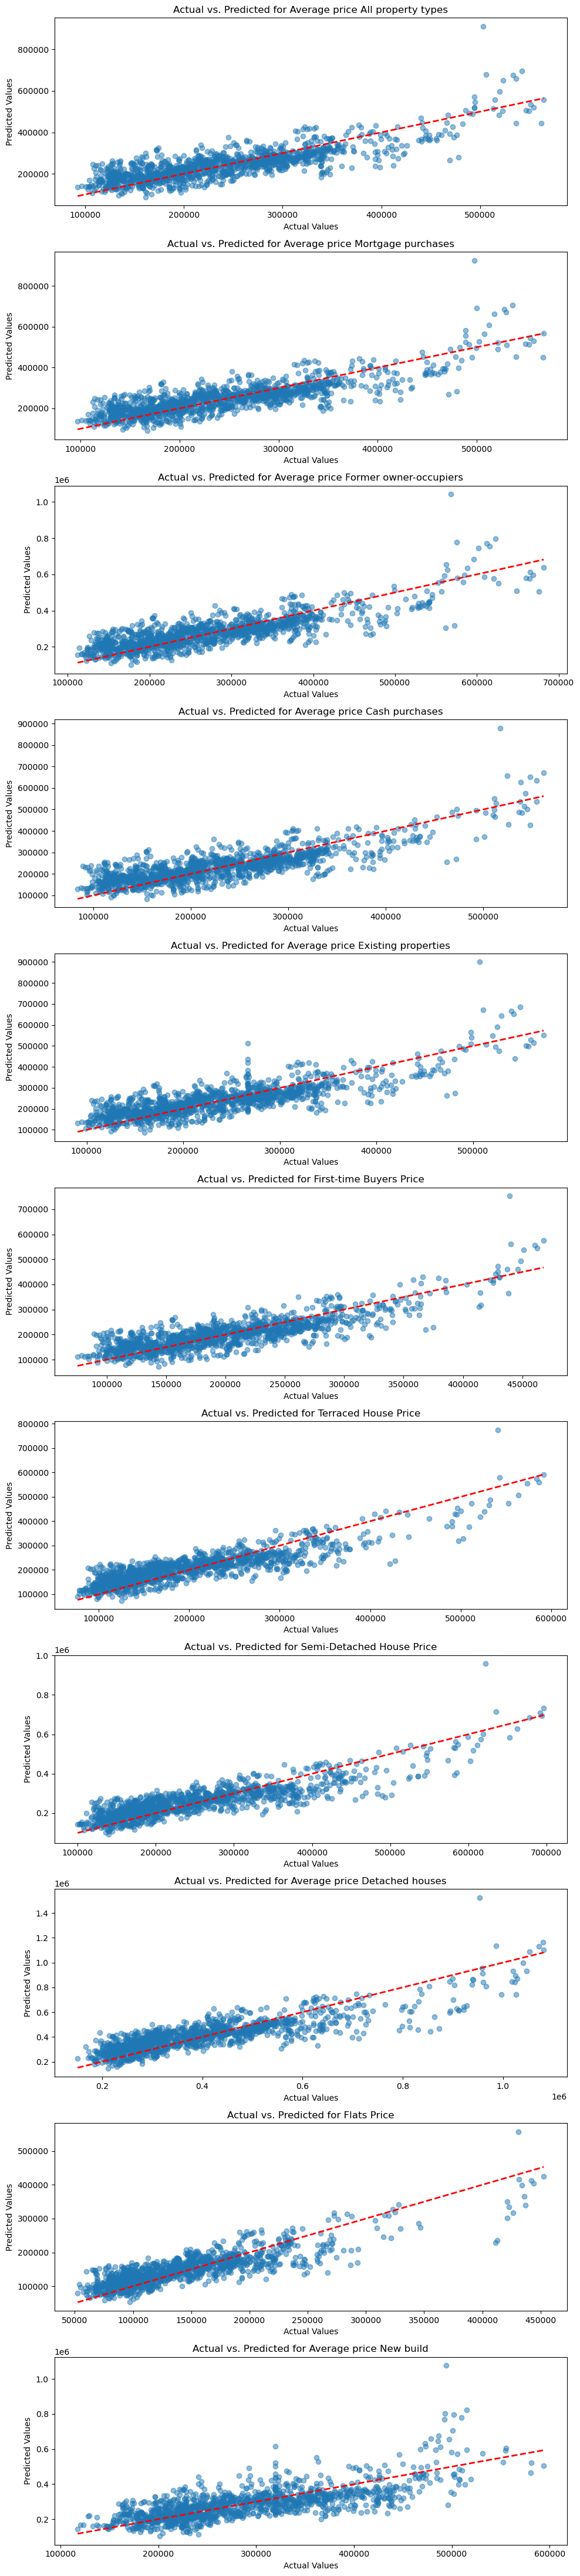

In [18]:
import matplotlib.pyplot as plt
# Predicting on the test set
y_pred = model.predict(X_test)

# Plotting the actual vs. predicted values for each target variable
fig, axes = plt.subplots(nrows=len(target_variables), ncols=1, figsize=(10, len(target_variables) * 4))

for i, target in enumerate(target_variables):
    ax = axes[i]
    ax.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    ax.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
            [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--', lw=2)
    ax.set_title(f'Actual vs. Predicted for {target}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


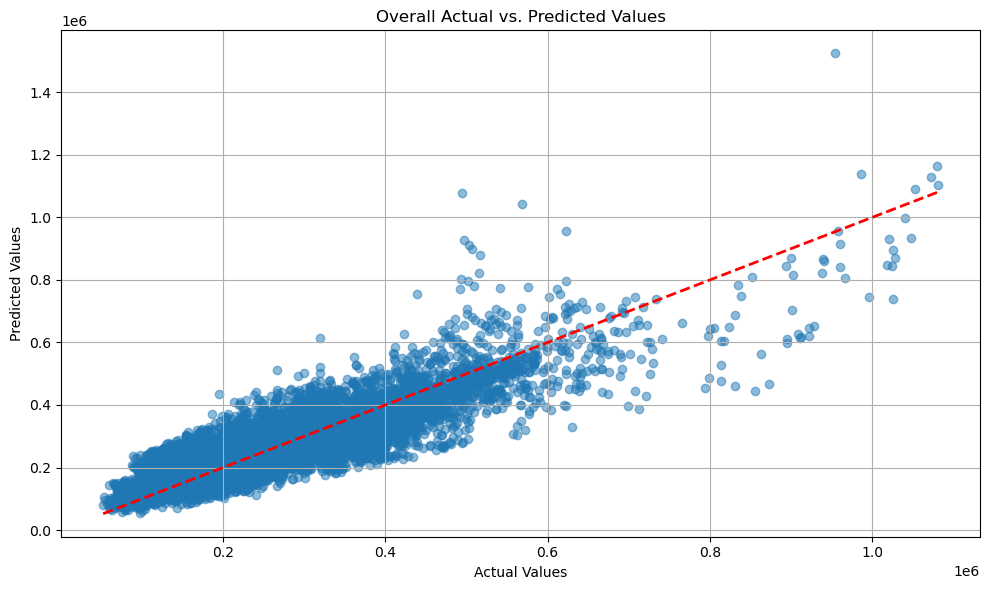

In [19]:

# Predicting on the test set
y_pred = model.predict(X_test)

# Flatten the actual and predicted values across all target variables
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

# Plotting the overall actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, y_pred_flat, alpha=0.5)
plt.plot([y_test_flat.min(), y_test_flat.max()],
         [y_test_flat.min(), y_test_flat.max()], 'r--', lw=2)
plt.title('Overall Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


The code below showcases all the metricd that are used to evaluate the accuracy of the model. The detailed explanation on every metric is given Chapter 3 of the report with theoritical discussion. The code below gives overall aggregate of the metrics.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics for each target variable
evaluation_metrics = {}
for i, target in enumerate(target_variables):
    actual = y_test.iloc[:, i]
    predicted = y_pred[:, i]
    
    r2 = r2_score(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = mse ** 0.5
    mape = (abs((actual - predicted) / actual).mean()) * 100
    
    evaluation_metrics[target] = {
        'R^2 Score': r2,
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Percentage Error (MAPE)': mape
    }

# Print the evaluation metrics
for target, metrics in evaluation_metrics.items():
    print(f"Metrics for {target}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
Metrics for Average price All property types:
  R^2 Score: 0.6566
  Mean Absolute Error (MAE): 39467.0485
  Mean Squared Error (MSE): 2674702294.7847
  Root Mean Squared Error (RMSE): 51717.5241
  Mean Absolute Percentage Error (MAPE): 18.8519

Metrics for Average price Mortgage purchases:
  R^2 Score: 0.6556
  Mean Absolute Error (MAE): 39462.5862
  Mean Squared Error (MSE): 2677188751.2558
  Root Mean Squared Error (RMSE): 51741.5573
  Mean Absolute Percentage Error (MAPE): 18.2153

Metrics for Average price Former owner-occupiers:
  R^2 Score: 0.6620
  Mean Absolute Error (MAE): 45459.2089
  Mean Squared Error (MSE): 3552726604.3986
  Root Mean Squared Error (RMSE): 59604.7532
  Mean Absolute Percentage Error (MAPE): 18.8457

Metrics for Average price Cash purchases:
  R^2 Score: 0.6476
  Mean Absolute Error (MAE): 40218.0908
  Mean Squared Error (MSE): 2728306727.2838
  Root Mean Squared Error (RMSE): 52233.1956
  Mean Absolute Percentage Er

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate overall evaluation metrics for the entire dataset
r2_overall = r2_score(y_test, y_pred)
mae_overall = mean_absolute_error(y_test, y_pred)
rmse_overall = np.sqrt(np.mean((y_test - y_pred) ** 2))
mape_overall = (np.abs((y_test - y_pred) / y_test).mean().mean()) * 100  # Ensure this is a scalar

# Store the overall metrics in a dictionary
overall_metrics = {
    'R^2 Score': r2_overall,
    'Mean Absolute Error (MAE)': mae_overall,
    'Root Mean Squared Error (RMSE)': rmse_overall,
    'Mean Absolute Percentage Error (MAPE)': mape_overall
}

# Print the overall evaluation metrics
print("Overall Evaluation Metrics for the Entire Dataset:")
for metric_name, value in overall_metrics.items():
    print(f"  {metric_name}: {value:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
Overall Evaluation Metrics for the Entire Dataset:
  R^2 Score: 0.6556
  Mean Absolute Error (MAE): 41309.4951
  Root Mean Squared Error (RMSE): 55934.5821
  Mean Absolute Percentage Error (MAPE): 19.0077


In [22]:

# Example usage: Predict for a specific county and country
county_name = 'Greater Manchester'  # Replace with your desired county
country_name = 'England'  # Replace with your desired country
predictions_df = predict_for_location(county_name, country_name, model, data, scaler)

print(predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
    Average price All property types  Average price Mortgage purchases  \
0                      223280.328125                     226872.593750   
1                      212939.031250                     216365.296875   
2                      203100.609375                     206368.937500   
3                      193359.546875                     196471.515625   
4                      183904.593750                     186864.687500   
5                      174645.781250                     177457.218750   
6                      165955.984375                     168627.968750   
7                      159253.546875                     161817.953125   
8                      242803.703125                     246710.531250   
9                      241768.421875                     245658.734375   
10                     241874.312500                     245766.375000   
11                     243378.609375                     247294.890625   


In [23]:
#Summarises the architecture of the model

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,050 (898.64 KB)

 Trainable params: 76,683 (299.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 153,367 (599.09 KB)